# Assignment 2
Realfagslektormaster, programing course

Author: Paul Knutson

## 1a
$$ P(x) = x^3 - 2x^2 + x - 2 $$

The user can change the x (input value). In this case, $P(3) = 10$.

In [14]:
def P(x):
    return x**3 - 2*x**2 + x - 2


print(P(3))

10


## 1b
Here, $P(p, x)$ is generic polynomial function, described by the coefficient list $p$, giving

$$ P(p, x) = p_0 x^0 + p_1 x^1 + p_2 x^2 + ... + p_n x^n $$

where $n$ is the size of the coefficient list. In the code, $p$ is reversed (i.e. the index of $p$ is actually going from $n$ to $0$). The example function is the same as described in 1 a.

In [15]:
# Vector describing/defining the polynomial function.
p = [-2, 1, -2, 1]


# Function of x (scalar) and p (vector)
def P(p, x):
    y = 0
    for i in range(len(p)):
        y += p[i] * x**i
    return y


print(P(p, 3))

10


## 1c
Here, $u$ is a list of $x$-values as used in the previous task. The results from $P(x)$, or in this case, $P(u_i)$ is stored and plotted.

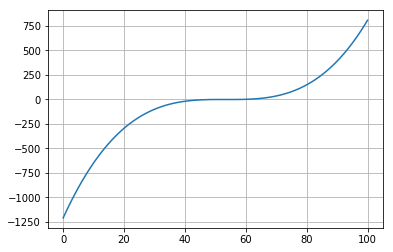

In [16]:
# For maths and plotting
import matplotlib.pyplot as plt
import numpy as np

# Vector describing/defining the polynomial function.
p = [-2, 1, -2, 1]


# Function of x (scalar) and p (vector)
def P(p, x):
    y = 0
    for i in range(len(p)):
        y += p[i] * x**i
    return y


def P_vect(u):
    v = [0]*len(u)
    for i in range(len(u)):
        v[i] = P(p, u[i])
    return v


u = np.linspace(-10, 10, 101)
y_values = P_vect(u)
x_values = np.linspace(0, len(y_values) -1, len(y_values))

# Plotting
#fig = plt.figure()
plt.grid(True)
plt.plot(x_values, y_values)
plt.show()

## 1d
This one is similar to c, but where $P$ is used recursive instead of using a list $u$. As can be seen below, the values become huge extremely quickly.

In [17]:
# Vector describing/defining the polynomial function.
p = [-2, 1, -2, 1]


# Function of x (scalar) and p (vector)
def P(x, n):
    y = 0
    for i in range(len(p)):
        y += p[i] * x**i
    if n == 0:
        return x
    elif n == 1:
        return y
    else:
        return P(y, n-1)


def P_rec(x, n):
    result = [0]*n
    for i in range(n):
        result[i] = P(x, i)
    return result


a = 3   # Input number
n = 5   # Vector size/factorial "loops".
print(P_rec(a, n))

[3, 10, 808, 526209190, 145705278066681752856855988]


## 1e
This is the same as 1d, but with an input vector of size $n$, similar to c. This return an $n \times n$ matrix of values.

In [18]:
# Vector describing/defining the polynomial function.
p = [-2, 1, -2, 1]


# Function of x (scalar) and p (vector)
def P(x, n):
    y = 0
    for i in range(len(p)):
        y += p[i] * x**i
    if n == 0:
        return x
    elif n == 1:
        return y
    else:
        return P(y, n-1)


def P_rec(x, n):
    result = [0]*n
    for i in range(n):
        result[i] = P(x, i)
    return result


def P_rec_vect(u, n):
    v = [0]*len(u)
    for i in range(len(u)):
        v[i] = P_rec(u[i], n)
    return v


u = [0, 1, 2, 3, 4]
n = 5   # Vector size/factorial "loops".
print(P_rec_vect(u, n))

[[0, -2, -20, -8822, -686751492440], [1, -2, -20, -8822, -686751492440], [2, 0, -2, -20, -8822], [3, 10, 808, 526209190, 145705278066681752856855988], [4, 34, 37024, 50748890433694, 130701223790327158929922808431521266881804]]


## 2a
This plots a single point. The values can be changed to get different points.

$u_0 = -u_1 \implies v = [0, 0]^T$

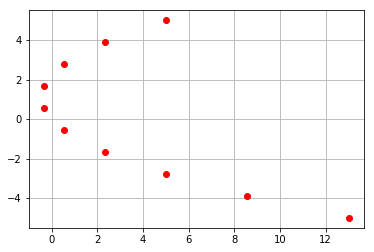

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Input matrix and vector
#A = [[1, 0.5], [1, 0.5]]
#u = [5, 6]
A = [[1, 2], [3, 4]]
u = [2, 1]


# Hard coded dot product (and transpose) function for (2x2) x (2x1) = (2x1).
def dot_product(A, u):
    v = [0]*len(u)
    
    v[0] = A[0][0] * u[0] + A[0][1] * u[1]
    v[1] = A[1][0] * u[0] + A[1][1] * u[1]
    
    return v


v_lst = []
def add(A, u):
    v_lst.append(dot_product(A, u))


def plot(v_lst):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(True)

    for i in range(len(v_lst)):
        plt.plot(v_lst[i][0], v_lst[i][1], 'ro')
    
    fig.show()


#v_lst = []
#v_lst.append(plot_point([[1, 2], [3, 4]],       [2, 1]))
#v_lst.append(plot_point([[1, 0.5], [1, 0.5]],   [5, 6]))
#v_lst.append(plot_point())


x = np.linspace(-1, 1, 10)
for i in range(len(x)):
    add([[x[i], x[i]], [-x[i], x[i]]], [i, i - len(x)/2])

#add([[1, 2], [3, 4]],       [2, 1])
#add([[1, 0.5], [1, 0.5]],   [5, 6])
#add([[-1, 1], [-1, 1]],     [-3, -3])

plot(v_lst)

## 2b
This plots the values of the trigonometric matrix function $T$, with the variable input $\theta, [0, 2 \pi]$.

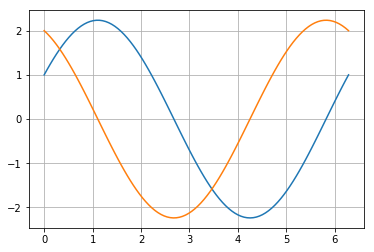

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math

u = [1,2]


# Hard coded dot product (and transpose) function for (2x2) x (2x1) = (2x1).
def dot_product(A, u):
    v = [0]*len(u)
    
    v[0] = A[0][0] * u[0] + A[0][1] * u[1]
    v[1] = A[1][0] * u[0] + A[1][1] * u[1]
    
    return v


# Returns a matrix based on the given trigonometric variables.
def matrix(theta):
    T = [[math.cos(theta),   math.sin(theta)],
            [-math.sin(theta),  math.cos(theta)]]
    return T


# Set steps, make x (linspace) and empty y-list
steps = 100
x = np.linspace(0, 2*math.pi, steps)
y = [None]*steps


# Loop the function through all theta, dot_product(matrix(theta), u).
for idx in range(steps):
    theta = x[idx]
    T = matrix(theta)
    y[idx] = dot_product(T, u)

    
    

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
plt.plot(x, y)
fig.show()

## 2c

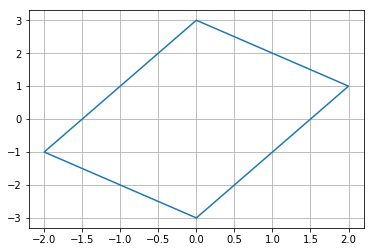

In [21]:
import matplotlib.pyplot as plt
import numpy as np


A = [[1, -1], [2, 1]]


def dot_product(A, u):
    v = [0]*len(u)
    
    v[0] = A[0][0] * u[0] + A[0][1] * u[1]
    v[1] = A[1][0] * u[0] + A[1][1] * u[1]
    
    return v


x = [-1, 1, 1, -1, -1]
y = [-1, -1, 1, 1, -1]


def dot_list():
    for i in range(len(x)):
        p = dot_product(A, [x[i], y[i]])
        x[i] = p[0]
        y[i] = p[1]


dot_list()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
plt.plot(x, y)
fig.show()

## 2d
Same as c, but iterate the dot product.

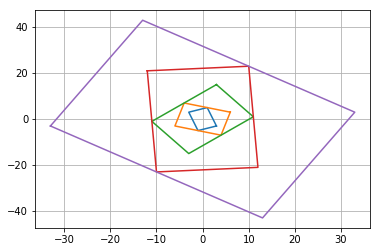

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

for i in range(5):
    dot_list()
    plt.plot(x, y)

fig.show()

## 2e

This rotates and misforms the functions oridinal shape.
$f(x) = x^3, x \in [-1, 1]$

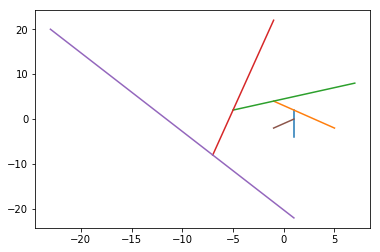

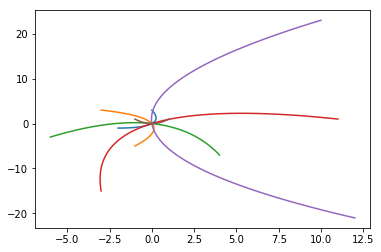

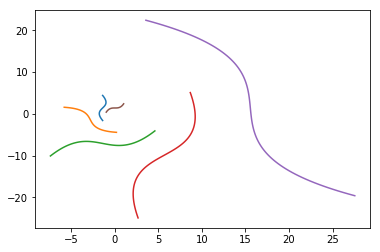

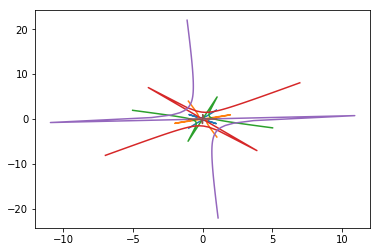

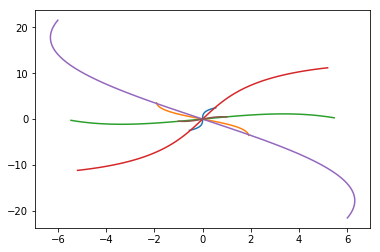

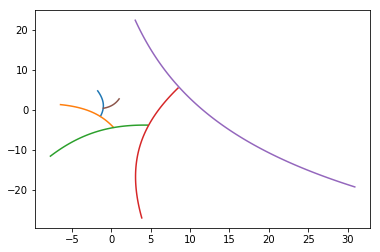

In [23]:
def f(x):
    return x - 1

def g(x):
    return x**2

def h(x):
    return x**3 + np.sqrt(2)

def k(x):
    return 1/(100*x)

def r(x):
    return np.sin(x) * np.cos(x)

def s(x):
    return np.e**x

def plot(f, n=1):
    X = np.linspace(-1, 1, 100)
    Y = f(X)
    X_orig = X.copy()
    Y_orig = Y.copy()
    
    fig = plt.figure()
        
    
    for j in range(n):
        for i in range(len(X)):
            p = dot_product(A, [X[i], Y[i]])
            X[i] = p[0]
            Y[i] = p[1]
        plt.plot(X, Y)
    plt.plot(X_orig, Y_orig)
    fig.show()

    
plot(f, 5)
plot(g, 5)
plot(h, 5)
plot(k, 5)
plot(r, 5)
plot(s, 5)

## 3a
This is a converging function for $1 < \lambda < 2.9$.
$x$ is just an initial value and has to be $0 < x < 1$ for the function to work properly.

$L^n(x)$ becomes smaller, as $n \to \infty$ (or $4$), when $\lambda < 1.5$.

With $\lambda > 1.5$, $L$ first grows bigger, then smaller, as $n \to \infty$
$$ \lim_{n \to \infty} L^n(x) = \infty $$

In [24]:
# Initial values
n = 20         # List size
lst = [0]*n     # Make empty list
x = 0.5
lmda = 1.5


# Function L
def L(x, lmda):
    return lmda * x*(1-x)


# Use L "recursively"
def L_rec(x, lmda, rec_level):
    for i in range(rec_level):
        x = L(x, lmda)
    return x


# Make list
for i in range(n):
    lst[i] = L_rec(x, lmda, i)


# Print list
for i in range(n):
    print(lst[i])

0.5
0.375
0.3515625
0.341949462890625
0.3375300415791571
0.3354052689160944
0.33436286174912516
0.3338465076480908
0.33358952546889614
0.3334613309494993
0.3333973075663317
0.33336531431077876
0.3333493222878816
0.33334132742713746
0.33333733028437706
0.33333533178489183
0.33333433255312184
0.33333383294172997
0.3333335831371573
0.33333345823515165


## 3b


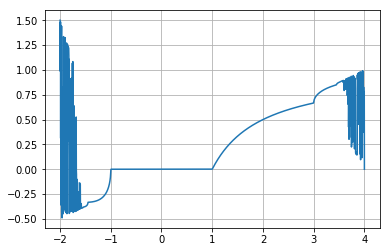

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Function L
def L(x, lmda):
    return lmda * x*(1-x)


# Use L "recursively"
def L_rec(x, lmda, rec_level):
    for i in range(rec_level):
        x = L(x, lmda)
    return x


depth = 1001
x = 0.5
lambdas = np.linspace(-2, 4, 2001)
Ls = []


for i in range(len(lambdas)):
    Ls.append(L_rec(x, lambdas[i], depth))


fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

plt.plot(lambdas, Ls)
fig.show()

# 3c
The series converges to a predictable, single, non-zero number around $1 < \lambda \lessapprox 2.9$, (or between $2.9$ and $3.0$).

$-1 \leq \lambda \leq 1$ will cause $L = 0$.

The diagram seems to become a [bifurcation diagram](https://en.wikipedia.org/wiki/Bifurcation_diagram). Change the depth by 1, and the lines flip, indicating the lines would split up every time it seems to "jump" a bit. This can indeed also be seen when letting $\lambda$ become lower than $-1$, as seen below. $\lambda > 4$ or $\lambda < -2$ will cause double scalar overflow (at least in Jupyter), so keep $-2 \leq \lambda \leq 4$.
The plots below show a range of lines, and how they split.

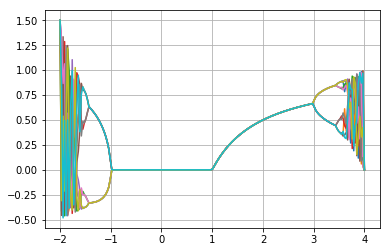

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Function L
def L(x, lmda):
    return lmda * x*(1-x)


# Use L "recursively"
def L_rec(x, lmda, rec_level):
    for i in range(rec_level):
        x = L(x, lmda)
    return x

fig = plt.figure()
lines = 10
for j in range(lines):
    n = 201 + j
    x = 0.5
    lambdas = np.linspace(-2, 4, 201)
    Ls = []


    for i in range(len(lambdas)):
        Ls.append(L_rec(x, lambdas[i], n))


    
    ax = fig.add_subplot(111)
    ax.grid(True)

    plt.plot(lambdas, Ls)
fig.show()